In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import pandas as pd
import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std

plt.rcParams.update({'font.size': 14})

## Laborator: exerciţii şi probleme

__Q1__. Potriviți o regresie liniară pentru setul father.son cu father.height ca și predictor pentru son.height. 

a) Dați p-value pentru panta regresiei și formulați cele două ipoteze și interpretați rezultatul testului.

b) Interpretați de asemenea și intercept-ul. Centrați x în zero, re-aplicați regresia și interpretați intercept-ul.

In [2]:
father_son = pd.read_csv('father_son.csv')
father_son.head()

,Unnamed: 0,fheight,sheight
0,1,65.04851,59.77827
1,2,63.25094,63.21404
2,3,64.95532,63.34242
3,4,65.75250,62.79238
4,5,61.13723,64.28113


In [3]:
sheight = father_son['sheight'].values
fheight = father_son['fheight'].values

X = np.array(fheight)
Y = np.array(sheight)

In [4]:
xext = sm.add_constant(X)
lm = sm.OLS(Y, xext).fit()

print('Intercept:', lm.params[0])
print('Coefficient:', lm.params[1]) #slope

Intercept: 33.88660435407803
Coefficient: 0.5140930386233069


In [5]:
print(f'R Q1. a)')

pval_panta = lm.pvalues[1]
print(f'p-value pentru panta regresiei: {pval_panta}')
print(f'Ipoteza nula presupune ca nu exista corelatie intre inaltimile tatilor si inaltimile fiilor, deci panta egala cu 0.')
print(f'Ipoteza alternativa presupune ca exista corelatie intre inaltimile tatilor si inaltimile fiilor, deci panta diferita de 0.')
print(f'Cum p-value are o valoarea mica, ipoteza nula este rejectata, ipoteza alternativa este acceptata si consideram ca exista corelatie intre inaltimi.')

R Q1. a)
p-value pentru panta regresiei: 1.1212675496327264e-69
Ipoteza nula presupune ca nu exista corelatie intre inaltimile tatilor si inaltimile fiilor, deci panta egala cu 0.
Ipoteza alternativa presupune ca exista corelatie intre inaltimile tatilor si inaltimile fiilor, deci panta diferita de 0.
Cum p-value are o valoarea mica, ipoteza nula este rejectata, ipoteza alternativa este acceptata si consideram ca exista corelatie intre inaltimi.


In [6]:
print(f'R Q1. b)')

X_centered = X - np.mean(X)

xext_centered = sm.add_constant(X_centered)
lm = sm.OLS(Y, xext_centered).fit()

intercept = lm.params[0]
print(f'Intercept centered: {intercept}')
print(f'Valoarea asteptata a raspunsului este beta0 doar daca predictorul este 0.')

R Q1. b)
Intercept centered: 68.68406965677178
Valoarea asteptata a raspunsului este beta0 doar daca predictorul este 0.


__Q2__. Pentru același set father.son, preziceți înălțimea fiului dacă tatăl are înălțimea 80. Ați recomanda această predicție? Care este intervalul de confidență asociat predicției (care este intevalul de valori 95%)?

In [7]:
X = np.array(fheight)
Y = np.array(sheight)

xext = sm.add_constant(X)
lm = sm.OLS(Y, xext).fit()

print('Intercept:', lm.params[0])
print('Coefficient:', lm.params[1]) #slope

Intercept: 33.88660435407803
Coefficient: 0.5140930386233069


In [8]:
beta0 = lm.params[0]
beta1 = lm.params[1]

x_fheight = 80
y_sheight = beta0 + beta1 * x_fheight

n = len(X)
X_mean = np.mean(X)

# t quantile
t = stats.t.ppf(0.975, df=n-2)

# dispersia reziduurilor
sigma = np.sqrt(np.sum(lm.resid**2)/(n-2))

# confidence interval pentru predictie (prediction interval)
pi = t * sigma * np.sqrt(1 + 1/n + (x_fheight-X_mean)**2 / np.sum((X-X_mean)**2))

# confidence interval
ci = [y_sheight - pi, y_sheight + pi]

In [9]:
print(f'R Q2. Inaltimea fiului', y_sheight)
print(f'R Q2. Intervalul de confidenta: ({ci[0]}, {ci[1]})')

R Q2. Inaltimea fiului 75.01404744394259
R Q2. Intervalul de confidenta: (70.1864553646568, 79.84163952322838)


__Q3__. Pentru setul mtcars:

a) Realizați regresia liniară pentru mpg ca și răspuns (outcome) respectiv horsepower ca și predictor. Dați interpretarea coeficienților, recentrînd x dacă e necesar. 

b) Puneți dreapta de regresie pe un scatterplot.

c) Testați ipoteza că nu există nici o corelație liniară între horsepower și mpg.

d) Ridicați un plot al reziduurilor vs. horsepower. Estimați dispersia reziduurilor direct, respectiv folosind modelul calculat.

e) Care este R-squared și ce exprimă el pentru acest caz?

In [10]:
mtcars = pd.read_csv('mtcars.csv')
mtcars.head()

,Unnamed: 0,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [11]:
mpg = mtcars['mpg'].values
hp = mtcars['hp'].values

In [12]:
print(f'R Q3. a)')

X_hp = np.array(hp)
Y_mpg = np.array(mpg)

xext = sm.add_constant(X_hp)
lm = sm.OLS(Y_mpg, xext).fit()

print('Intercept:', lm.params[0])
print('Coefficient:', lm.params[1]) #slope

X_centered = X_hp - np.mean(X_hp)

xext_centered = sm.add_constant(X_centered)
lm_centered = sm.OLS(Y_mpg, xext_centered).fit()

intercept = lm_centered.params[0]
print(f'Intercept centered: {intercept}')
print('Coefficient centered:', lm.params[1]) #slope
print('Translatarea valorilor X nu a modificat panta (coefficient).')

R Q3. a)
Intercept: 30.098860539622514
Coefficient: -0.06822827807156365
Intercept centered: 20.090625000000003
Coefficient centered: -0.06822827807156365
Translatarea valorilor X nu a modificat panta (coefficient).


R Q3. b)


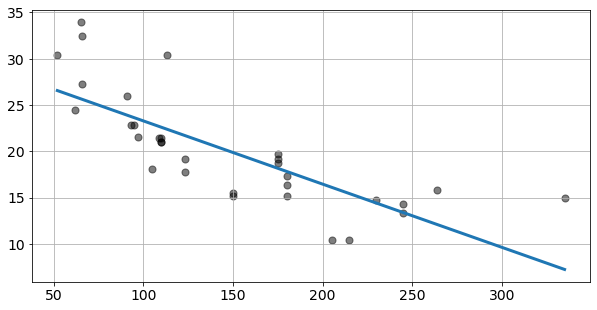

In [13]:
print(f'R Q3. b)')

beta0 = lm.params[0] #lm fara centrare
beta1 = lm.params[1]

x1 = np.linspace(np.min(X_hp), np.max(X_hp), 100)
y1 = beta0 + beta1 * x1

fig, ax = plt.subplots(1, 1, figsize=(10, 5))
ax.scatter(X_hp, Y_mpg, c='k', alpha=0.5, s=50)
ax.plot(x1, y1, lw=3)
ax.grid(True)
plt.show()

In [14]:
print(f'R Q3. c)')

pval_intercept = lm.pvalues[0]
pval_panta = lm.pvalues[1]
print(f'p-value pentru intercept: {pval_intercept}')
print(f'p-value pentru panta: {pval_panta}')
print(f'Ipoteza nula presupune ca nu exista corelatie liniara intre horsepower si mpg, deci panta egala cu 0.')
print(f'Ipoteza alternativa presupune ca exista corelatie liniara intre horsepower si mpg, deci panta diferita de 0.')
print(f'Cum p-value are o valoarea mica, ipoteza nula este rejectata, ipoteza alternativa este acceptata si consideram ca exista corelatie intre puterea masinii si consumul acesteia.')

R Q3. c)
p-value pentru intercept: 6.64273603046494e-18
p-value pentru panta: 1.7878352541210751e-07
Ipoteza nula presupune ca nu exista corelatie liniara intre horsepower si mpg, deci panta egala cu 0.
Ipoteza alternativa presupune ca exista corelatie liniara intre horsepower si mpg, deci panta diferita de 0.
Cum p-value are o valoarea mica, ipoteza nula este rejectata, ipoteza alternativa este acceptata si consideram ca exista corelatie intre puterea masinii si consumul acesteia.


R Q3. d)


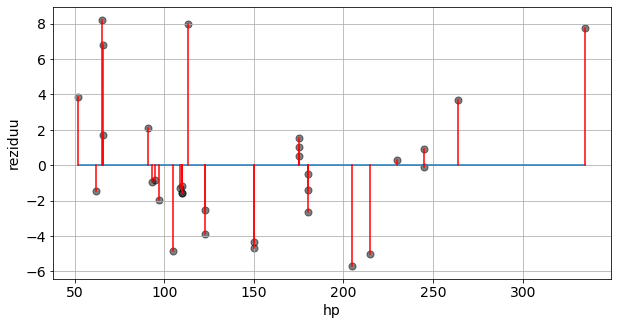

R Q3. d) Dispersia reziduurilor din calcul: 14.92247711815339
R Q3. d) Dispersia reziduurilor din model: 14.922477118153392


In [15]:
print(f'R Q3. d)')

fig, ax = plt.subplots(1, 1, figsize=(10, 5))
ax.scatter(X_hp, lm.resid, c='k', alpha=0.5, s=50)
plt.plot([np.min(X_hp), np.max(X_hp)], [0, 0])
[plt.plot([X_hp[i], X_hp[i]], [0, lm.resid[i]], c='r') for i in range(len(X_hp))]
ax.set(xlabel="hp", ylabel="reziduu")
ax.grid(True)
plt.show()

# dispersia reziduurilor
n = len(lm.resid)
sigma = np.sum(lm.resid**2)/(n-2)

print(f'R Q3. d) Dispersia reziduurilor din calcul: {sigma}')
print(f'R Q3. d) Dispersia reziduurilor din model: {lm.scale}')

In [16]:
r_squared = lm.rsquared
print(f'R-squared: {r_squared}')

print(f'R Q3. e) R-squared este mai apropiat de valoarea 1.')
print(f'R Q3. e) R-squared exprima faptul ca modelul de regresie aplicat se potriveste datelor observate (ie, datele observate sunt aproximate bine de modelul de regresie).')

R-squared: 0.602437341423934
R Q3. e) R-squared este mai apropiat de valoarea 1.
R Q3. e) R-squared exprima faptul ca modelul de regresie aplicat se potriveste datelor observate (ie, datele observate sunt aproximate bine de modelul de regresie).


__Q4__. Pentru setul father.son:

a) Calculați intervalul de confidență pentru intercept și pentru slope.

b) Calculați intervalul de confidență pentru valoarea așteptată a înălțimii fiului pentru valoarea medie a înălțimii taților (confidence interval pentru linia de regresie, într-un punct dat).

c) Calculați prediction interval pentru înălțimea fiului pentru valoarea medie a înălțimii taților (confidence interval pentru predicție, într-un punct dat).

d) Puneți pe un scatter plot punctele, dreapta de regresie și intervalele de confidență pentru valoarea așteptată respectiv predicție.

In [17]:
father_son = pd.read_csv('father_son.csv')
father_son.head()

,Unnamed: 0,fheight,sheight
0,1,65.04851,59.77827
1,2,63.25094,63.21404
2,3,64.95532,63.34242
3,4,65.75250,62.79238
4,5,61.13723,64.28113


In [18]:
sheight = father_son['sheight'].values
fheight = father_son['fheight'].values

X = np.array(fheight)
Y = np.array(sheight)

xext = sm.add_constant(X)
lm = sm.OLS(Y, xext).fit()

print('Intercept:', lm.params[0])
print('Coefficient:', lm.params[1]) #slope

Intercept: 33.88660435407803
Coefficient: 0.5140930386233069


In [19]:
n = len(lm.resid)
sigma = np.sqrt(np.sum(lm.resid**2)/(n - 2))
print('sigma:', sigma)

beta0 = lm.params[0]
beta1 = lm.params[1]

X_mean = np.mean(X)

sx = np.sum((X - X_mean)**2)
se_beta0 = np.sqrt(1/n + X_mean**2 / sx) * sigma
se_beta1 = sigma / np.sqrt(sx)

i_beta0 = beta0 + np.array([-1, 1]) * stats.t.ppf(0.975, df=n-2) * se_beta0
i_beta1 = beta1 + np.array([-1, 1]) * stats.t.ppf(0.975, df=n-2) * se_beta1

print(f'R Q4. a) Interval confidenta intercept:\n({i_beta0[0]}, {i_beta0[1]})')
print(f'R Q4. a) Interval confidenta panta:\n({i_beta1[0]}, {i_beta1[1]})')

sigma: 2.4365557916187015
R Q4. a) Interval confidenta intercept:
(30.29121256675792, 37.48199614139814)
R Q4. a) Interval confidenta panta:
(0.4610187890641677, 0.5671672881824461)


In [20]:
#reload variables
beta0 = lm.params[0]
beta1 = lm.params[1]

X = np.array(fheight)
Y = np.array(sheight)

X_expected = np.mean(X)
Y_expected = beta0 + beta1 * X_expected

X_mean = np.mean(X_expected)

# dispersia reziduurilor
n = len(lm.resid)
sigma = np.sqrt(np.sum(lm.resid**2)/(n - 2))
print('sigma:', sigma)

# t quantile
t = stats.t.ppf(0.975, df=n-2)

# confidence interval pentru dreapta
ci = t * sigma * np.sqrt(1/n + (X_expected - X_mean)**2 / np.sum((X - X_mean)**2))
print('ci:', ci)

ci_b = [Y_expected - ci, Y_expected + ci]
print(f'R Q4. b) Interval confidenta linia de regresie:\n({ci_b[0]}, {ci_b[1]})')

sigma: 2.4365557916187015
ci: 0.1456142450606105
R Q4. b) Interval confidenta linia de regresie:
(68.53845541171124, 68.82968390183247)


In [21]:
print(f'R Q4. c)')

x1 = np.linspace(np.min(X_expected), np.max(X_expected), 100)
y1 = beta0 + beta1 * x1

X_mean = np.mean(X)

# confidence interval pentru predictie (prediction interval)
pi = t * sigma * np.sqrt(1 + 1/n + (X_expected-X_mean)**2 / np.sum((X - X_mean)**2))
print('pi:', pi)

pi_c = [Y_expected - pi, Y_expected + pi]
print(f'R Q4. b) Interval confidenta predictie:\n({pi_c[0]}, {pi_c[1]})')

R Q4. c)
pi: 4.783156439567148
R Q4. b) Interval confidenta predictie:
(63.9009132172047, 73.467226096339)


In [22]:
beta0 = lm.params[0]
beta1 = lm.params[1]

x1 = np.linspace(np.min(X), np.max(X), 100)
y1 = beta0 + beta1 * x1

n = len(lm.resid)
X_mean = np.mean(X)

# t quantile
t = stats.t.ppf(0.975, df=n-2)

# dispersia reziduurilor
sigma = np.sqrt(np.sum(lm.resid**2)/(n-2))

# confidence interval pentru dreapta
ci = t * sigma * np.sqrt(1/n + (x1 - X_mean)**2 / np.sum((X - X_mean)**2))

# confidence interval pentru predictie (prediction interval)
pi = t * sigma * np.sqrt(1 + 1/n + (x1 - X_mean)**2 / np.sum((X - X_mean)**2))

R Q4. d)


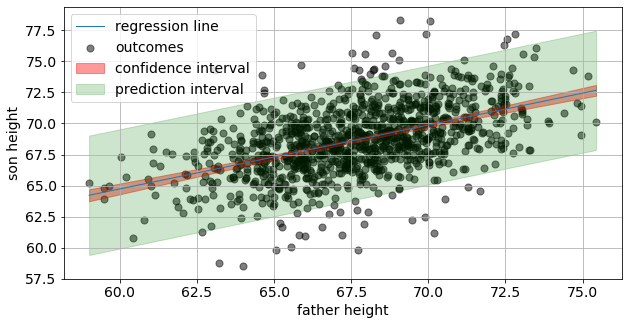

In [23]:
print(f'R Q4. d)')

fig, ax = plt.subplots(1, 1, figsize=(10, 5))
ax.scatter(X, Y, c='k', alpha=0.5, s=50)
ax.plot(x1, y1, lw=1)
ax.fill_between(x1, y1-ci, y1+ci, color='red', alpha=0.4)
ax.fill_between(x1, y1-pi, y1+pi, color='green', alpha=0.2)
ax.set(xlabel="father height", ylabel="son height")
ax.grid(True)
ax.legend(['regression line', 'outcomes', 'confidence interval', 'prediction interval'])
plt.show()

__Q5__. Pentru setul mtcars, realizați același lucruri ca la întrebarea anterioară.

In [24]:
mtcars = pd.read_csv('mtcars.csv')
mtcars.head()

,Unnamed: 0,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [25]:
mpg = mtcars['mpg'].values
hp = mtcars['hp'].values

In [26]:
X = np.array(hp)
Y = np.array(mpg)

xext = sm.add_constant(X)
lm = sm.OLS(Y, xext).fit()

print('Intercept:', lm.params[0])
print('Coefficient:', lm.params[1]) #slope

Intercept: 30.098860539622514
Coefficient: -0.06822827807156365


In [27]:
n = len(lm.resid)
sigma = np.sqrt(np.sum(lm.resid**2)/(n - 2))
print('sigma:', sigma)

beta0 = lm.params[0]
beta1 = lm.params[1]

X_mean = np.mean(X)

sx = np.sum((X - X_mean)**2)
se_beta0 = np.sqrt(1/n + X_mean**2 / sx) * sigma
se_beta1 = sigma / np.sqrt(sx)

i_beta0 = beta0 + np.array([-1, 1]) * stats.t.ppf(0.975, df=n-2) * se_beta0
i_beta1 = beta1 + np.array([-1, 1]) * stats.t.ppf(0.975, df=n-2) * se_beta1

print(f'R Q5. a) Interval confidenta intercept:\n({i_beta0[0]}, {i_beta0[1]})')
print(f'R Q5. a) Interval confidenta panta:\n({i_beta1[0]}, {i_beta1[1]})')

sigma: 3.8629622206479564
R Q5. a) Interval confidenta intercept:
(26.761948787045345, 33.43577229219968)
R Q5. a) Interval confidenta panta:
(-0.08889465352053423, -0.047561902622593064)


In [28]:
#reload variables
beta0 = lm.params[0]
beta1 = lm.params[1]

X = np.array(hp)
Y = np.array(mpg)

X_expected = np.mean(X)
Y_expected = beta0 + beta1 * X_expected

X_mean = np.mean(X_expected)

# dispersia reziduurilor
n = len(lm.resid)
sigma = np.sqrt(np.sum(lm.resid**2)/(n - 2))
print('sigma:', sigma)

# t quantile
t = stats.t.ppf(0.975, df=n-2)

# confidence interval pentru dreapta
ci = t * sigma * np.sqrt(1/n + (X_expected - X_mean)**2 / np.sum((X - X_mean)**2))
print('ci:', ci)

ci_b = [Y_expected - ci, Y_expected + ci]
print(f'R Q5. b) Interval confidenta linia de regresie:\n({ci_b[0]}, {ci_b[1]})')

sigma: 3.8629622206479564
ci: 1.3946304774724445
R Q5. b) Interval confidenta linia de regresie:
(18.695994522527577, 21.485255477472464)


In [29]:
x1 = np.linspace(np.min(X_expected), np.max(X_expected), 100)
y1 = beta0 + beta1 * x1

X_mean = np.mean(X)

# confidence interval pentru predictie (prediction interval)
pi = t * sigma * np.sqrt(1 + 1/n + (X_expected-X_mean)**2 / np.sum((X - X_mean)**2))
print('pi:', pi)

pi_c = [Y_expected - pi, Y_expected + pi]
print(f'R Q5. c) Interval confidenta predictie:\n({pi_c[0]}, {pi_c[1]})')

pi: 8.011542146611701
R Q5. c) Interval confidenta predictie:
(12.07908285338832, 28.10216714661172)


In [30]:
beta0 = lm.params[0]
beta1 = lm.params[1]

x1 = np.linspace(np.min(X), np.max(X), 100)
y1 = beta0 + beta1 * x1

n = len(lm.resid)
X_mean = np.mean(X)

# t quantile
t = stats.t.ppf(0.975, df=n-2)

# dispersia reziduurilor
sigma = np.sqrt(np.sum(lm.resid**2)/(n-2))

# confidence interval pentru dreapta
ci = t * sigma * np.sqrt(1/n + (x1 - X_mean)**2 / np.sum((X - X_mean)**2))

# confidence interval pentru predictie (prediction interval)
pi = t * sigma * np.sqrt(1 + 1/n + (x1 - X_mean)**2 / np.sum((X - X_mean)**2))

R Q5. d)


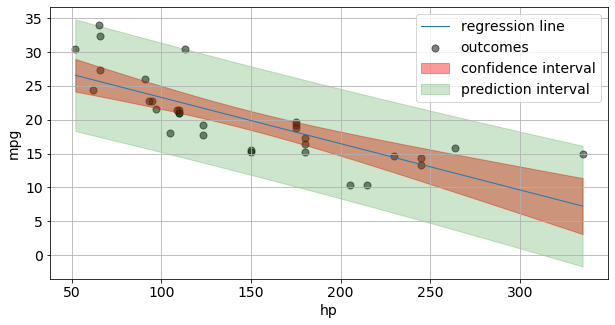

In [31]:
print(f'R Q5. d)')

fig, ax = plt.subplots(1, 1, figsize=(10, 5))
ax.scatter(X, Y, c='k', alpha=0.5, s=50)
ax.plot(x1, y1, lw=1)
ax.fill_between(x1, y1-ci, y1+ci, color='red', alpha=0.4)
ax.fill_between(x1, y1-pi, y1+pi, color='green', alpha=0.2)
ax.set(xlabel="hp", ylabel="mpg")
ax.grid(True)
ax.legend(['regression line', 'outcomes', 'confidence interval', 'prediction interval'])
plt.show()

__Q6__. Construiți două dataset-uri, y funcție de x, unul fără și altul cu variație reziduală (heteroscedasticity). x-urile vor fi comune (de exemplu, x = 1 .. 10). Mediile și dispersiile lor trebuie să fie egale. 

a) Determinați dreptele de regresie.

b) Ridicați diagrama reziduurilor.

c) Determinați R-squared.

d) Afișați intevalele de confidență pentru răspunsul așteptat (dreapta de regresie) respectiv pentru predicție.

Ce concluzii trageți?

In [32]:
n = 50

x = np.random.rand(n) * 6
y_1 = x + np.random.rand(n) - 0.5
y_2 = x + (np.random.rand(n) - 0.5) * .001 * x #heteroscedasticity

print('Media y_1:', np.mean(y_1))
print('Media y_2:', np.mean(y_2))

print('Dispersia y_1:', np.std(y_1))
print('Dispersia y_2:', np.std(y_2))

Media y_1: 2.8982848631119036
Media y_2: 2.8701275359547025
Dispersia y_1: 1.7803455272546487
Dispersia y_2: 1.7992972218191616


In [33]:
print(f'R Q6. a)')

xext = sm.add_constant(x)
lm = sm.OLS(y_1, xext).fit()
resid = lm.resid

beta0 = lm.params[0]
beta1 = lm.params[1]

print('Intercept:', beta0)
print('Slope:', beta1)

R Q6. a)
Intercept: 0.10352081427013743
Slope: 0.9736761745477305


In [34]:
print(f'R Q6. a)')

xext = sm.add_constant(x)
lm_h = sm.OLS(y_2, xext).fit()
resid_h = lm_h.resid

beta0_h = lm_h.params[0]
beta1_h = lm_h.params[1]

print('Intercept (heteroscedasticity):', beta0_h)
print('Slope (heteroscedasticity):', beta1_h)

R Q6. a)
Intercept (heteroscedasticity): 7.209172361475474e-05
Slope (heteroscedasticity): 0.9999071681335456


In [35]:
def plot_reziduu(x, resid):
    fig, ax = plt.subplots(1, 1, figsize=(10, 5))
    ax.scatter(x, resid, c='k', alpha=0.5, s=50)
    plt.plot([np.min(x), np.max(x)], [0, 0])
    [plt.plot([x[i], x[i]], [0, resid[i]], c='r') for i in range(len(x))]
    ax.set(xlabel="x", ylabel="reziduu")
    ax.grid(True)
    plt.show()

R Q6. b) Plot reziduu


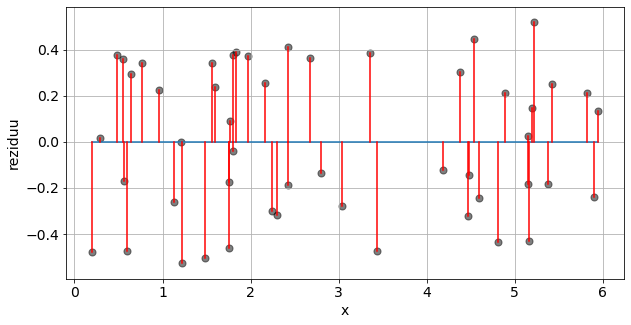

In [36]:
print(f'R Q6. b) Plot reziduu')

plot_reziduu(x, resid)

R Q6. b) Plot reziduu (heteroscedasticity)


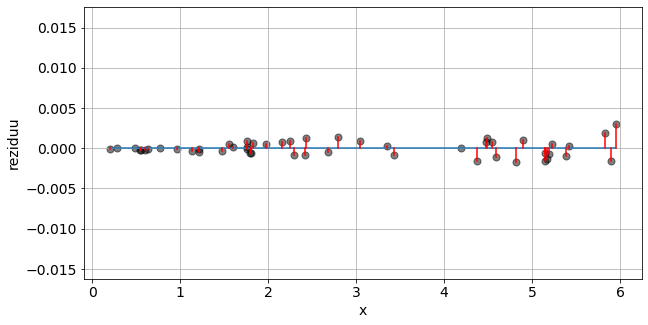

In [37]:
print(f'R Q6. b) Plot reziduu (heteroscedasticity)')

plot_reziduu(x, resid_h)

In [38]:
r_squared = lm.rsquared
print(f'R Q6. c) R-squared: {r_squared}')

r_squared_h = lm_h.rsquared
print(f'R Q6. c) R-squared (heteroscedasticity): {r_squared_h}')

print(f'Se observa ca ambele valori R-squared sunt foarte aproape de 1.')

R Q6. c) R-squared: 0.9685160615077194
R Q6. c) R-squared (heteroscedasticity): 0.9999997269639498
Se observa ca ambele valori R-squared sunt foarte aproape de 1.


In [39]:
def plot_regression_line(X, Y, x1, y1, ci, pi):
    fig, ax = plt.subplots(1, 1, figsize=(10, 5))
    ax.scatter(X, Y, c='k', alpha=0.5, s=50)
    ax.plot(x1, y1, lw=1)
    ax.fill_between(x1, y1-ci, y1+ci, color='red', alpha=0.4)
    ax.fill_between(x1, y1-pi, y1+pi, color='green', alpha=0.2)
    ax.grid(True)
    ax.legend(['regression line', 'outcomes', 'confidence interval', 'prediction interval'])
    plt.show()

In [40]:
def build_regression_line(x, y, beta0, beta1, resid):
    lm_resid = lm.resid
    
    x1 = np.linspace(np.min(x), np.max(x), 100)
    y1_d = beta0 + beta1 * x1

    n = len(resid)
    x_mean = np.mean(x)

    # t quantile
    t = stats.t.ppf(0.975, df=n-2)

    # dispersia reziduurilor
    sigma = np.sqrt(np.sum(lm_resid**2)/(n-2))

    # confidence interval pentru dreapta
    ci = t * sigma * np.sqrt(1/n + (x1 - x_mean)**2 / np.sum((x - x_mean)**2))

    # confidence interval pentru predictie (prediction interval)
    pi = t * sigma * np.sqrt(1 + 1/n + (x1 - x_mean)**2 / np.sum((x - x_mean)**2))

    plot_regression_line(X=x, Y=y, x1=x1, y1=y1_d, ci=ci, pi=pi)

R Q6. d) Regression line


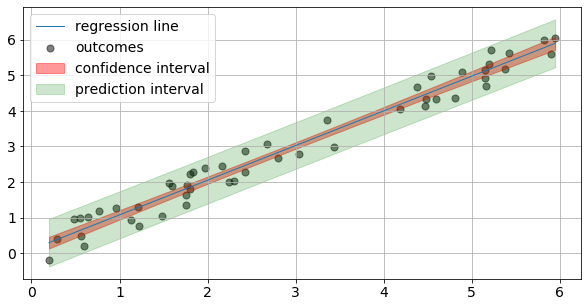

In [41]:
print(f'R Q6. d) Regression line')

build_regression_line(x, y_1, beta0, beta1, resid)

In [42]:
print(f'R Q6. In acest scatter plot se poate observa cum modelul de regresie nu este perfect - variatia nu este integral explicata de model.')

R Q6. In acest scatter plot se poate observa cum modelul de regresie nu este perfect - variatia nu este integral explicata de model.


R Q6. d) Regression line (heteroscedasticity)


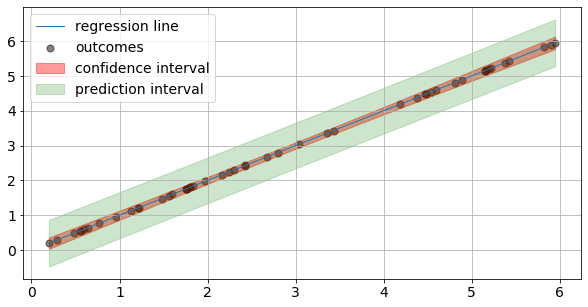

In [43]:
print(f'R Q6. d) Regression line (heteroscedasticity)')

build_regression_line(x, y_2, beta0_h, beta1_h, resid_h)

In [44]:
print(f'R Q6. In acest scatter plot se poate observa cum modelul de regresie explica integral variabilitatea.')

R Q6. In acest scatter plot se poate observa cum modelul de regresie explica integral variabilitatea.
